# Iris Flower Classification with Scikit-Learn

![Iris](https://github.com/featurestoreorg/serverless-ml-course/raw/main/src/01-module/assets/iris.png)


In this notebook we will, 

1. Load the Iris Flower dataset into Pandas from a CSV file
2. Split trainind data into train and test sets (one set each for features and labels)
3. Encode the label
4. Train a KNN Model using SkLearn
5. Evaluate model performance on the test set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

In [24]:
# We will download the 'raw' iris data

iris_df = pd.read_csv("https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


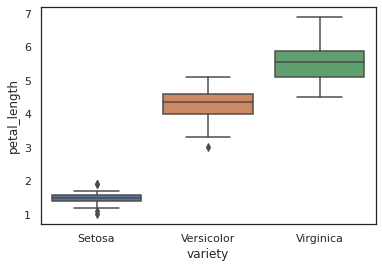

In [25]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_length', data=iris_df)

In [20]:
features = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
labels = iris_df[["variety"]]
labels.value_counts()

variety   
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size=0.2)

In [22]:
from sklearn import preprocessing

# Feature Engineering - transform the label from a categorical variable to a numerical variable. 
le = preprocessing.LabelEncoder()
y_train_encoded=le.fit_transform(y_train['variety'])
y_test_encoded=le.fit_transform(y_test['variety'])

KNeighborsClassifier(n_neighbors=4)

In [26]:
# Train the model
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train_encoded) 

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Make predictions with the test set
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

metrics = classification_report(y_test_encoded, y_pred)
print(metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89        12
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.93      0.91      0.91        30
weighted avg       0.92      0.90      0.90        30



In [28]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test_encoded, y_pred)
print(results)

[[ 7  0  0]
 [ 0 12  0]
 [ 0  3  8]]
